In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data Preparation

In [7]:
df=pd.read_csv('diabeties.csv ')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,NaN,85,66,29.0,0,26.6,0.351,NaN,0
2,8.0,183,64,0.0,0,NaN,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48.0,180,32.9,0.171,63.0,0
764,2.0,122,70,27.0,0,36.8,0.340,27.0,0
765,5.0,121,72,23.0,112,26.2,0.245,30.0,0
766,1.0,126,60,0.0,0,30.1,0.349,47.0,1


In [15]:

no_zeroes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in no_zeroes:
    mean_value = df[column][df[column] != 0].mean()
    df[column] = df[column].replace(0, mean_value) 
    
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6.0    148.0           72.0      35.000000  155.548223  33.6   
1            NaN     85.0           66.0      29.000000  155.548223  26.6   
2            8.0    183.0           64.0      29.142593  155.548223   NaN   
3            1.0     89.0           66.0      23.000000   94.000000  28.1   
4            0.0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763         10.0    101.0           76.0      48.000000  180.000000  32.9   
764          2.0    122.0           70.0      27.000000  155.548223  36.8   
765          5.0    121.0           72.0      23.000000  112.000000  26.2   
766          1.0    126.0           60.0      29.142593  155.548223  30.1   
767          1.0     93.0           70.0      31.000000  155.548223  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.62

In [9]:

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,NaN,85,66,29.0,0,26.6,0.351,NaN,0
2,8.0,183,64,0.0,0,NaN,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1


In [10]:

df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1.0,106,76,0.0,0,37.5,0.197,26.0,0
759,6.0,190,92,0.0,0,35.5,0.278,66.0,1
760,2.0,88,58,26.0,16,28.4,0.766,22.0,0
761,9.0,170,74,31.0,0,44.0,0.403,43.0,1
762,9.0,89,62,0.0,0,22.5,0.142,33.0,0
763,10.0,101,76,48.0,180,32.9,0.171,63.0,0
764,2.0,122,70,27.0,0,36.8,0.340,27.0,0
765,5.0,121,72,23.0,112,26.2,0.245,30.0,0
766,1.0,126,60,0.0,0,30.1,0.349,47.0,1
767,1.0,93,70,31.0,0,30.4,0.315,23.0,0


# EDA(Exploratory data analysis)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

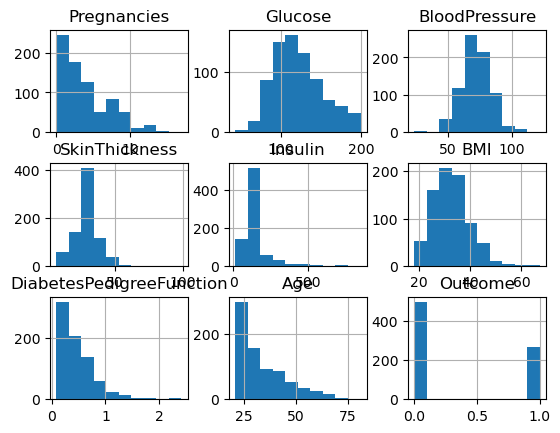

In [16]:
df.hist()

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,766.000000,768.000000,768.000000,767.000000,768.000000,767.000000,768.000000,767.000000,768.000000
mean,3.849869,121.686763,72.405184,29.142593,155.548223,32.469577,0.471876,33.243807,0.348958
std,3.372270,30.435949,12.096346,8.794137,85.021108,6.871666,0.331329,11.767627,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.550000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.142593,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
df.isnull().sum()

Pregnancies                 2
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    0
Age                         1
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

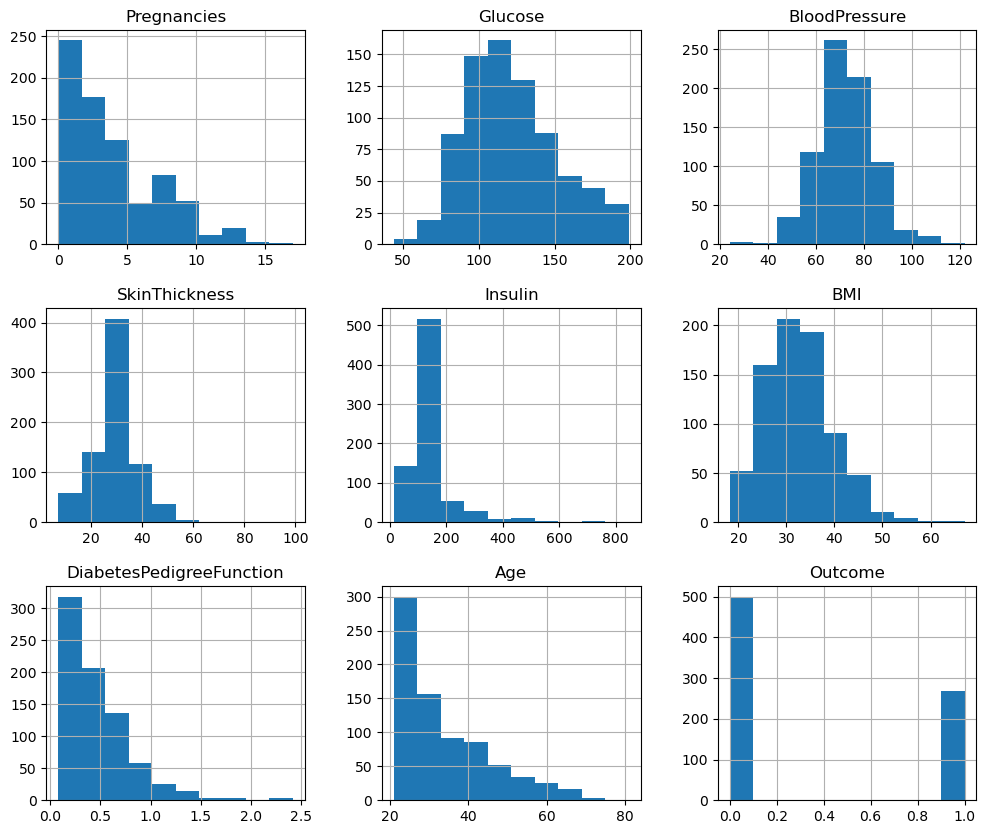

In [23]:
df.hist(figsize=(12,10))

In [24]:
df.shape

(768, 9)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               766 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


<Axes: >

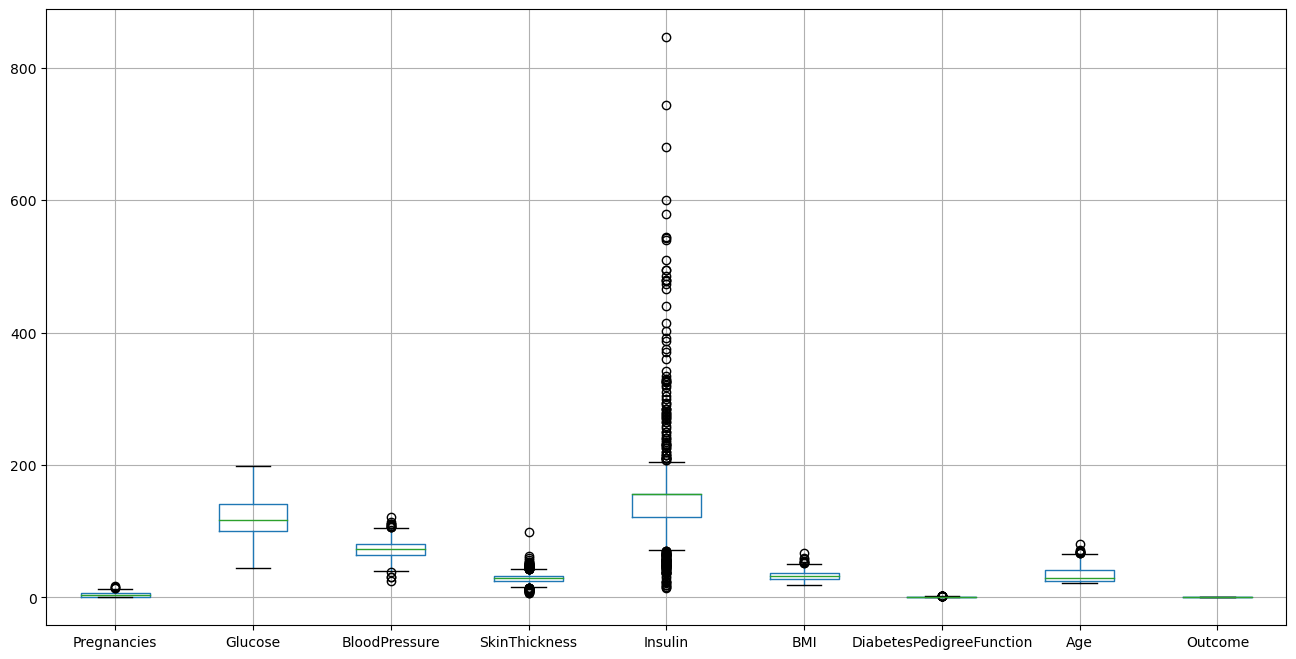

In [27]:
df.boxplot(figsize=(16,8))

<Axes: >

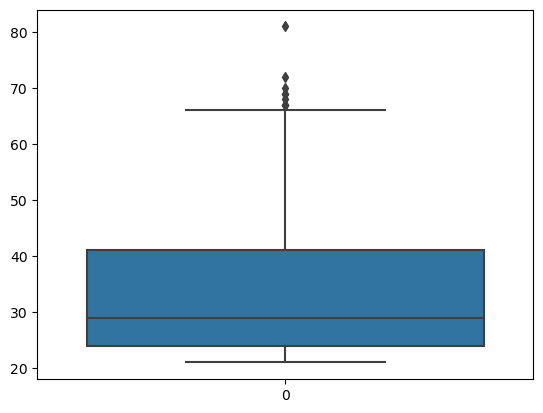

In [29]:
sns.boxplot(df['Age'])

<Axes: >

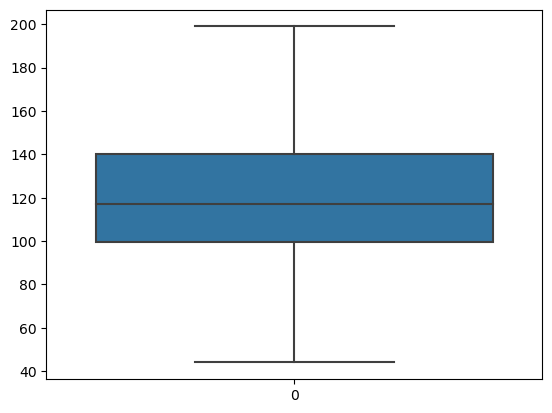

In [31]:
sns.boxplot(df['Glucose'])

<Axes: >

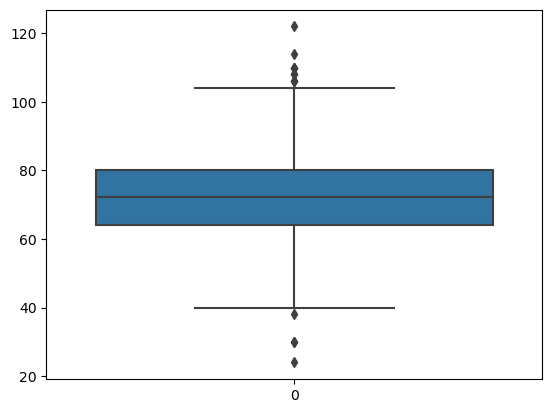

In [32]:
sns.boxplot(df['BloodPressure'])

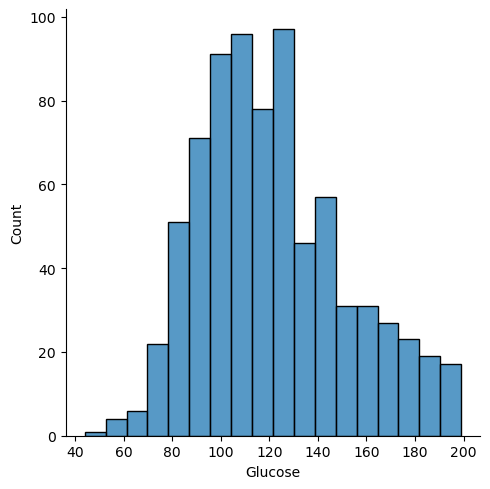

In [33]:
sns.displot(df['Glucose'])


<Axes: ylabel='count'>

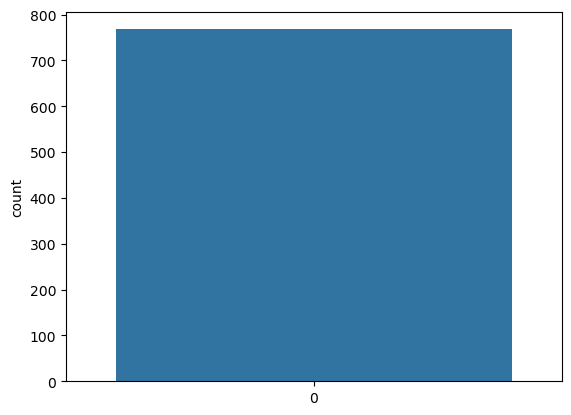

In [35]:
sns.countplot(df['Outcome'])

In [36]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126465,0.207939,0.081858,0.055817,0.022772,-0.034178,0.544352,0.222000
Glucose,0.126465,1.000000,0.218367,0.193103,0.420157,0.235326,0.137060,0.266493,0.492928
BloodPressure,0.207939,0.218367,1.000000,0.192308,0.072517,0.280478,-0.002763,0.324530,0.166074
SkinThickness,0.081858,0.193103,0.192308,1.000000,0.158185,0.543764,0.101656,0.128108,0.214407
Insulin,0.055817,0.420157,0.072517,0.158185,1.000000,0.166778,0.098634,0.136737,0.214411
BMI,0.022772,0.235326,0.280478,0.543764,0.166778,1.000000,0.154663,0.025159,0.315037
DiabetesPedigreeFunction,-0.034178,0.137060,-0.002763,0.101656,0.098634,0.154663,1.000000,0.033474,0.173844
Age,0.544352,0.266493,0.324530,0.128108,0.136737,0.025159,0.033474,1.000000,0.238263
Outcome,0.222000,0.492928,0.166074,0.214407,0.214411,0.315037,0.173844,0.238263,1.000000


<Axes: >

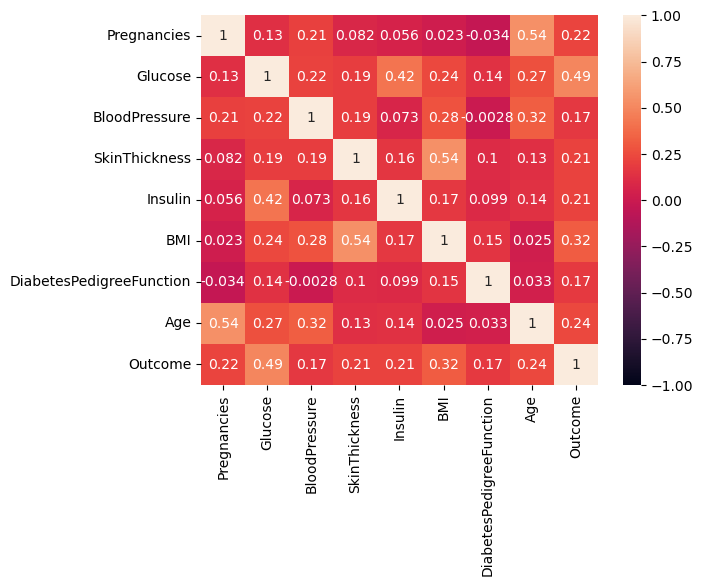

In [37]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

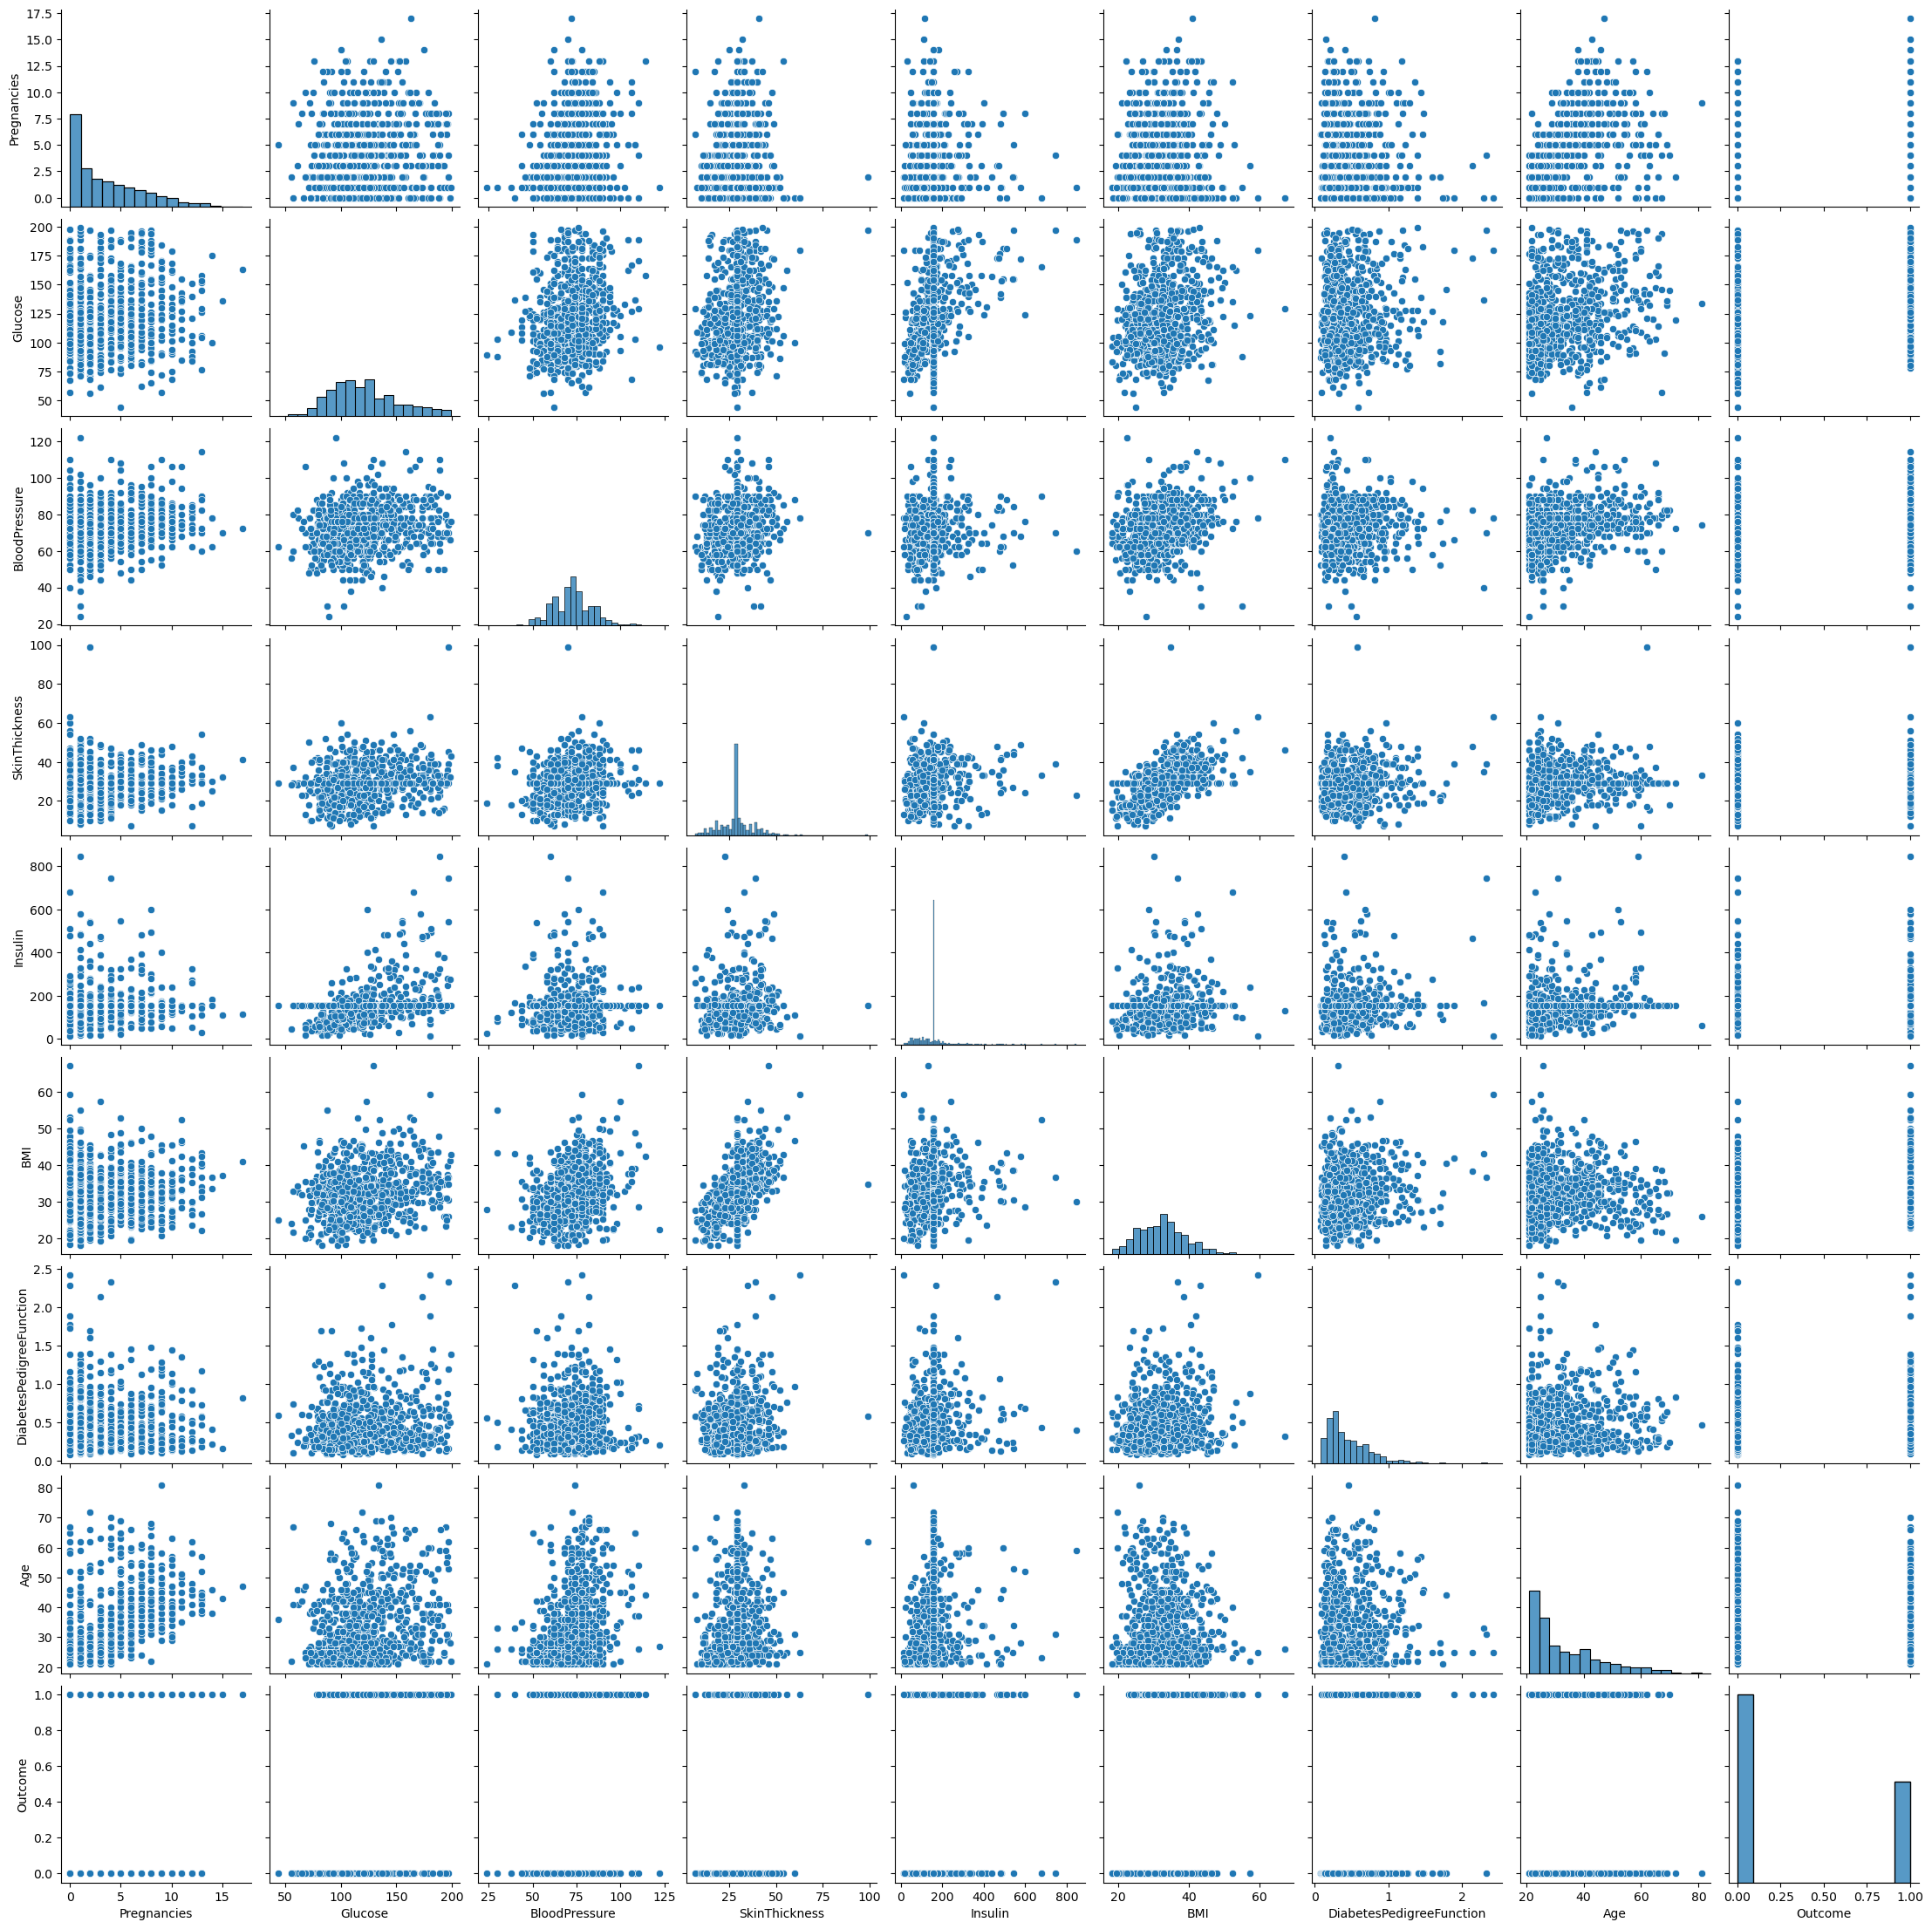

In [39]:
sns.pairplot(df)

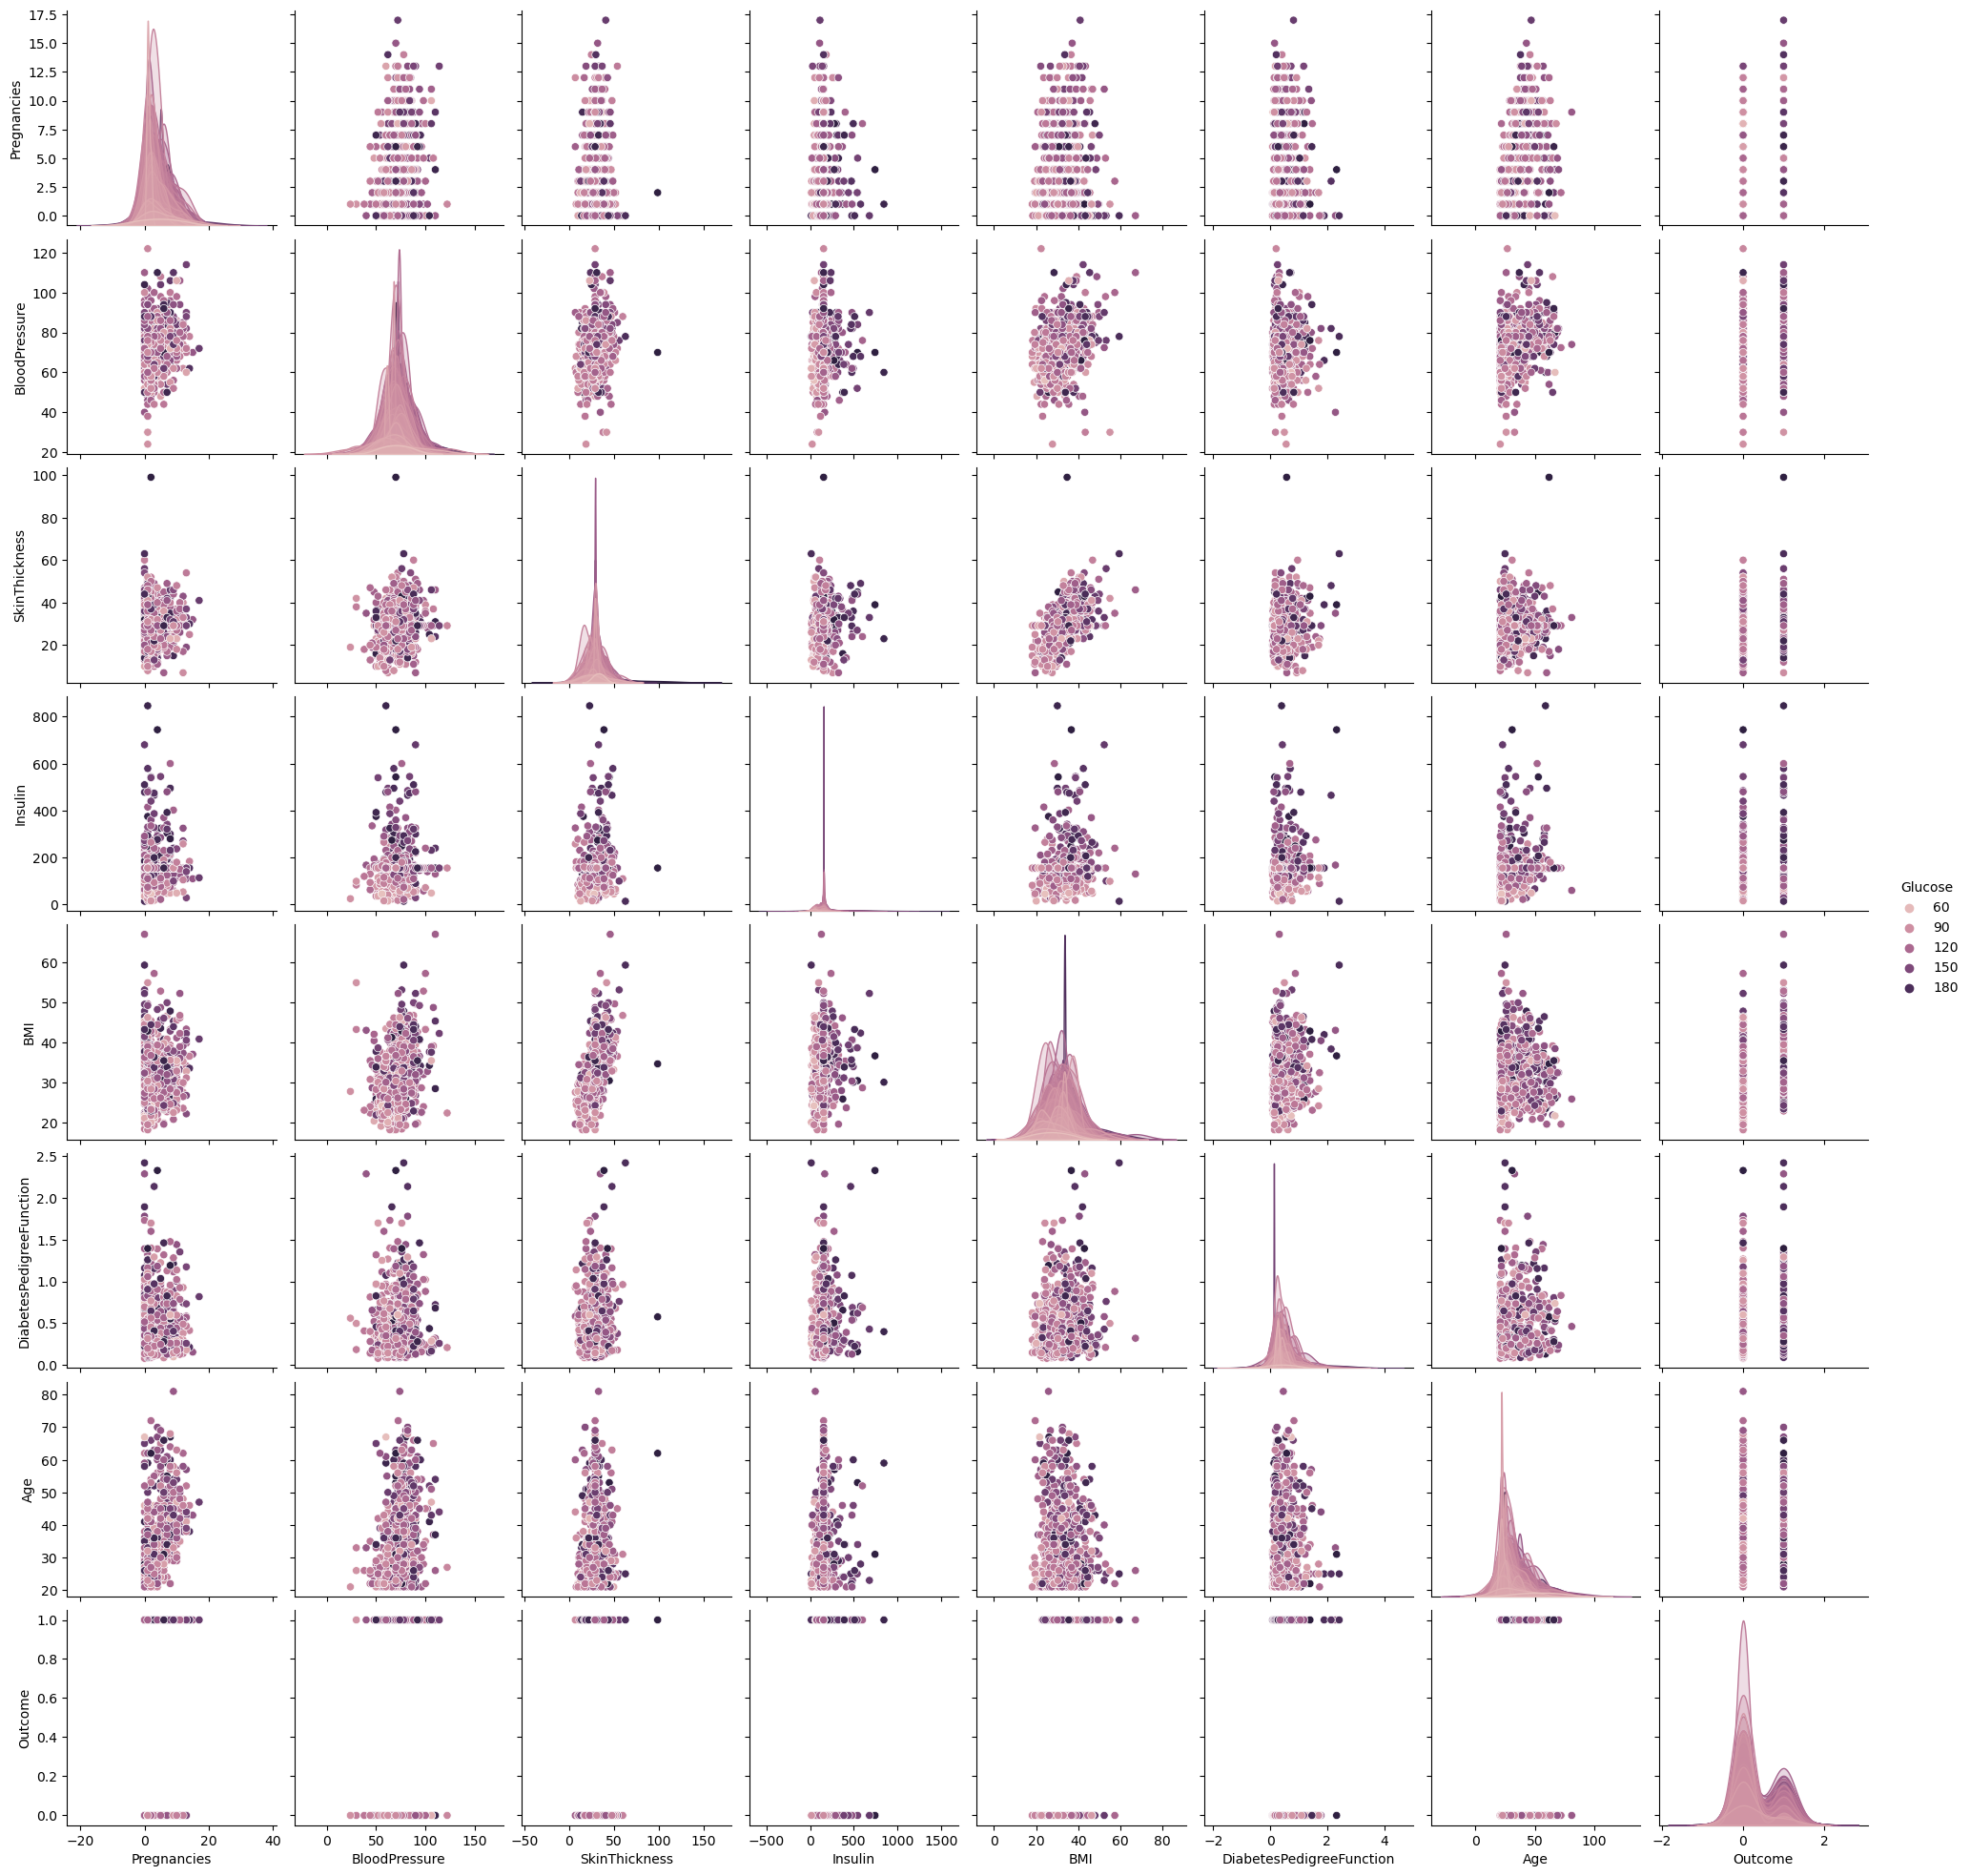

In [49]:
sns.pairplot(df,hue='Glucose')

# Build a Naive bayes model

In [48]:
x=df.iloc[:,:-1]
x.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,155.548223,33.6,0.627,50.0
1,NaN,85.0,66.0,29.000000,155.548223,26.6,0.351,NaN
2,8.0,183.0,64.0,29.142593,155.548223,NaN,0.672,32.0


In [52]:
x.shape

(768, 8)

In [53]:
y=df.iloc[:,-1:]
y.head(3)

,Outcome
0,1
1,0
2,1


In [54]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Splitting the data

In [4]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)

NameError: name 'train_test_split' is not defined